<a href="https://colab.research.google.com/github/vaibhavs825/Image-Encryption-using-AES-and-Shuffing/blob/master/Unsupervised%20image%20clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import argparse
import csv
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import functools
from keras import applications
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
import numpy as np
import pandas
from sklearn import (
    decomposition,
    manifold,
    pipeline,
)



FEATURE EXTRACTION 

In [0]:
def get_feature(model, metadata):
    print('{}'.format(metadata['id']))
    try:
        img_path = os.path.join('images', metadata['image'])
        if os.path.isfile(img_path):
            print('is file: {}'.format(img_path))
            try:
                # load image setting the image size to 224 x 224
                img = image.load_img(img_path, target_size=(224, 224))
                # convert image to numpy array
                x = image.img_to_array(img)
                # the image is now in an array of shape (3, 224, 224)
                # but we need to expand it to (1, 2, 224, 224) as Keras is expecting a list of images
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
                
                #model = applications.resnet50.ResNet50(weights='imagenet', include_top=False, pooling='avg')
                # extract the features
                features = model.predict(x)[0]
                # convert from Numpy to a list of values
                features_arr = np.char.mod('%f', features)

                return {"id": metadata['id'], "features": ','.join(features_arr)}
            except Exception as ex:
                # skip all exceptions for now
                print(ex)
                pass
    except Exception as ex:
        # skip all exceptions for now
        print(ex)
        pass
    return None


In [0]:
def create_features(filename,features):
  with open(filename, 'w') as output:
    w = csv.DictWriter(output, fieldnames=['id', 'features'], delimiter='\t', lineterminator='\n')
    w.writeheader()
    w.writerows(features)


In [10]:
data = pandas.read_csv("example.tsv", sep='\t')
file = "example_features_"

# RESNET
model_resnet = applications.resnet50.ResNet50(weights='imagenet', include_top=False, pooling='avg')
features_resnet = map(functools.partial(get_feature,model_resnet), data.T.to_dict().values())
# remove empty entries
features_resnet = filter(None, features_resnet)
create_features(file+"resnet.tsv",features_resnet)

# XCEPTION
model_xception = applications.xception.Xception(weights='imagenet', include_top=False, pooling='avg')
features_xception = map(functools.partial(get_feature,model_xception), data.T.to_dict().values())
# remove empty entries
features_xception = filter(None, features_xception)
create_features(file+"xception.tsv",features_xception)

# VGG-16
model_vgg16 = applications.vgg16.VGG16(weights='imagenet', include_top=False, pooling='avg')
features_vgg16 = map(functools.partial(get_feature,model_vgg16), data.T.to_dict().values())
# remove empty entries
features_vgg16 = filter(None, features_vgg16)
create_features(file+"vgg16.tsv",features_vgg16)

# VGG-19
model_vgg19 = applications.vgg19.VGG19(weights='imagenet', include_top=False, pooling='avg')
features_vgg19 = map(functools.partial(get_feature,model_vgg19), data.T.to_dict().values())
# remove empty entries
features_vgg19 = filter(None, features_vgg19)
create_features(file+"vgg19.tsv",features_vgg19)


# INCEPTION- V3
model_inceptionv3 = applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, pooling='avg')
features_inceptionv3 = map(functools.partial(get_feature,model_inceptionv3), data.T.to_dict().values())
# remove empty entries
features_inceptionv3 = filter(None, features_inceptionv3)
create_features(file+"inceptionv3.tsv",features_inceptionv3)

# MOBILENET
model_mobilenet = applications.mobilenet.MobileNet(weights='imagenet', include_top=False, pooling='avg')
features_mobilenet = map(functools.partial(get_feature,model_mobilenet), data.T.to_dict().values())
# remove empty entries
features_mobilenet = filter(None, features_mobilenet)
create_features(file+"mobilenet.tsv",features_mobilenet)

# extract features




0
is file: images/test_0.JPEG
1
is file: images/test_1.JPEG
2
is file: images/test_2.JPEG
3
is file: images/test_3.JPEG
4
is file: images/test_4.JPEG
5
is file: images/test_5.JPEG
6
is file: images/test_6.JPEG
7
is file: images/test_7.JPEG
8
is file: images/test_8.JPEG
9
is file: images/test_9.JPEG
10
is file: images/test_10.JPEG
11
is file: images/test_11.JPEG
12
is file: images/test_12.JPEG
13
is file: images/test_13.JPEG
14
is file: images/test_14.JPEG
15
is file: images/test_15.JPEG
16
is file: images/test_16.JPEG
17
is file: images/test_17.JPEG
18
is file: images/test_18.JPEG
19
is file: images/test_19.JPEG
83689472/83683744 [==============================] - 2s 0us/step
0
is file: images/test_0.JPEG
1
is file: images/test_1.JPEG
2
is file: images/test_2.JPEG
3
is file: images/test_3.JPEG
4
is file: images/test_4.JPEG
5
is file: images/test_5.JPEG
6
is file: images/test_6.JPEG
7
is file: images/test_7.JPEG
8
is file: images/test_8.JPEG
9
is file: images/test_9.JPEG
10
is file: ima

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:208: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


17227776/17225924 [==============================] - 1s 0us/step
0
is file: images/test_0.JPEG
1
is file: images/test_1.JPEG
2
is file: images/test_2.JPEG
3
is file: images/test_3.JPEG
4
is file: images/test_4.JPEG
5
is file: images/test_5.JPEG
6
is file: images/test_6.JPEG
7
is file: images/test_7.JPEG
8
is file: images/test_8.JPEG
9
is file: images/test_9.JPEG
10
is file: images/test_10.JPEG
11
is file: images/test_11.JPEG
12
is file: images/test_12.JPEG
13
is file: images/test_13.JPEG
14
is file: images/test_14.JPEG
15
is file: images/test_15.JPEG
16
is file: images/test_16.JPEG
17
is file: images/test_17.JPEG
18
is file: images/test_18.JPEG
19
is file: images/test_19.JPEG


APPLYING TSNE/PCA/PCA-TSNE

In [0]:
def process(data):
    # split the comma delimited string back into a list of values
    transformed = [d.split(',') for d in data['features']]

    # convert image data to float64 matrix. float64 is need for bh_sne
    x_data = np.asarray(transformed).astype('float64')
    x_data = x_data.reshape((x_data.shape[0], -1))

    # perform t-SNE
    #model = manifold.TSNE(random_state=0)

    #tsne = manifold.TSNE(random_state=0, perplexity=50, early_exaggeration=6.0)
    #pca = decomposition.PCA(n_components=2)
    #model = pipeline.Pipeline([('reduce_dims', pca), ('tsne', tsne)])

    model = decomposition.PCA(n_components=20)

    vis_data = model.fit_transform(x_data)

    # convert the results into a list of dict
    results = []
    for i in range(0, len(data)):
        results.append({
            'id': data['id'][i],
            'x': vis_data[i][0],
            'y': vis_data[i][1]
        })
    return results


In [0]:
def write_tsv(results, output_tsv):
    # write to a tab delimited file
    with open(output_tsv, 'w') as output:
        w = csv.DictWriter(
            output, fieldnames=['id', 'x', 'y'], delimiter='\t',
            lineterminator='\n')
        w.writeheader()
        w.writerows(results)


In [0]:
file = "example_features_"
# RESNET
data_resnet = pandas.read_csv(file+"resnet.tsv", sep='\t')
results_resnet = process(data_resnet)
write_tsv(results_resnet, file+"resnet_tsne.tsv")

# XCEPTION
data_xception = pandas.read_csv(file+"xception.tsv", sep='\t')
results_xception = process(data_xception)
write_tsv(results_xception, file+"xception_tsne.tsv")

# VGG-16
data_vgg16 = pandas.read_csv(file+"vgg16.tsv", sep='\t')
results_vgg16 = process(data_vgg16)
write_tsv(results_vgg16, file+"vgg16_tsne.tsv")

# VGG-19
data_vgg19 = pandas.read_csv(file+"vgg19.tsv", sep='\t')
results_vgg19 = process(data_vgg19)
write_tsv(results_vgg19, file+"vgg19_tsne.tsv")

# INCEPTION-V3
data_inceptionv3 = pandas.read_csv(file+"inceptionv3.tsv", sep='\t')
results_inceptionv3 = process(data_inceptionv3)
write_tsv(results_inceptionv3, file+"inceptionv3_tsne.tsv")

# MOBILENET
data_mobilenet = pandas.read_csv(file+"mobilenet.tsv", sep='\t')
results_mobilenet = process(data_mobilenet)
write_tsv(results_mobilenet, file+"mobilenet_tsne.tsv")

In [58]:
x = []
y = []
# RESNET
x_resnet = []
y_resnet = []
for i in results_resnet:
    x_resnet.append(i['x'])
    y_resnet.append(i['y'])
x.append(x_resnet)
y.append(y_resnet)
    
# XCEPTION
x_xception = []
y_xception = []
for i in results_xception:
    x_xception.append(i['x'])
    y_xception.append(i['y'])
x.append(x_xception)
y.append(y_xception)
    
# VGG-16
x_vgg16 = []
y_vgg16 = []
for i in results_vgg16:
    x_vgg16.append(i['x'])
    y_vgg16.append(i['y'])
x.append(x_vgg16)
y.append(y_vgg16)
    
# VGG-19
x_vgg19 = []
y_vgg19 = []
for i in results_vgg19:
    x_vgg19.append(i['x'])
    y_vgg19.append(i['y'])
x.append(x_vgg19)
y.append(y_vgg19)
    
# INCEPTION-V3
x_inceptionv3 = []
y_inceptionv3 = []
for i in results_inceptionv3:
    x_inceptionv3.append(i['x'])
    y_inceptionv3.append(i['y'])
x.append(x_inceptionv3)
y.append(y_inceptionv3)
    
# MOBILENET
x_mobilenet = []
y_mobilenet = []
for i in results_mobilenet:
    x_mobilenet.append(i['x'])
    y_mobilenet.append(i['y'])
x.append(x_mobilenet)
y.append(y_mobilenet)

print(x)
print(y)

[[-12.893019779981683, -0.7129435094946714, 20.053742926719085, 5.818006420891059, -12.241714136094641, -15.37291986493272, 1.0472698477925015, -4.912354366921045, -13.681987268456197, -13.550942789016196, -6.243786728471698, 19.33272258785485, 0.9051206078147362, -19.246436226014215, 17.341462238699393, 0.9853227358140213, 2.9783528291041854, 17.826294317096707, 7.0754670798135555, 5.492343077782948], [-23.238447126666944, -13.693077012659082, -11.134775439333978, 62.64477799335391, -41.67931059975673, -29.531994910079703, 5.503543851559552, -40.048627039495486, -34.32964437742649, -45.31413063229572, -22.02572250440809, 0.1549801192411824, 34.16975129126544, -13.355714466936591, 33.010752912993425, -59.210125544818325, 135.8753145733306, 1.5425360314131342, 62.10876026508346, -1.4488473843634517], [-50.40077570367488, 22.442050244348813, 97.33478953482059, 0.5647798610987703, -41.737096971442405, -13.133429235806434, -19.570399745532793, -18.981764206505147, -39.80719996610881, -29.2

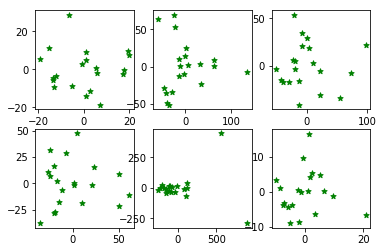

In [59]:

for i in range(1,7):
  plt.subplot(2,3,i)
  plt.scatter(x[i-1], y[i-1], label= "stars", color= "green", marker= "*", s=30) 


#plt.scatter(x[2], y[2], label= "stars", color= "green",  
            #marker= "*", s=30) 

APPLYING KMEANS

In [83]:
from sklearn.cluster import KMeans
 
# RESNET 
f_res = [d.split(',') for d in data_resnet['features']]
resnet = KMeans(n_clusters=2,random_state=0).fit(f_res)
print(resnet.labels_)

# XCEPTION
f_xce = [d.split(',') for d in data_xception['features']]
xception = KMeans(n_clusters=2,random_state=0).fit(f_xce)
print(xception.labels_)

# VGG-16
f_vgg16 = [d.split(',') for d in data_vgg16['features']]
vgg16 = KMeans(n_clusters=2,random_state=0).fit(f_vgg16)
print(vgg16.labels_)

# VGG-19
f_vgg19 = [d.split(',') for d in data_vgg19['features']]
vgg19 = KMeans(n_clusters=2,random_state=0).fit(f_vgg19)
print(vgg19.labels_)

# INCEPTION-V3
f_inc = [d.split(',') for d in data_inceptionv3['features']]
inceptionv3 = KMeans(n_clusters=2,random_state=0).fit(f_inc)
print(inceptionv3.labels_)

# MOBILENET
f_mob = [d.split(',') for d in data_mobilenet['features']]
mobilenet = KMeans(n_clusters=2,random_state=0).fit(f_mob)
print(mobilenet.labels_)

[1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
[1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1]
[0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0]
[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0]
[1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
[1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0]
